In [2]:
# boring setup cell
%reload_ext autoreload
%autoreload 2
from sage_cluster_pictures import *
latex.extra_preamble('')
latex.add_to_preamble(r"\usepackage{tkz-graph,semtkzX}")
latex.add_to_mathjax_avoid_list("clusterpicture")
sage.misc.latex.EMBEDDED_MODE = True
set_verbose(0)

## Symbolic clusters and BY-trees

As long as we are careful, nothing forces us to use genuine $p$-adic numbers to build our BY-trees. We can replicate the analysis in 3.3.1 of Betts Tamagawa v2

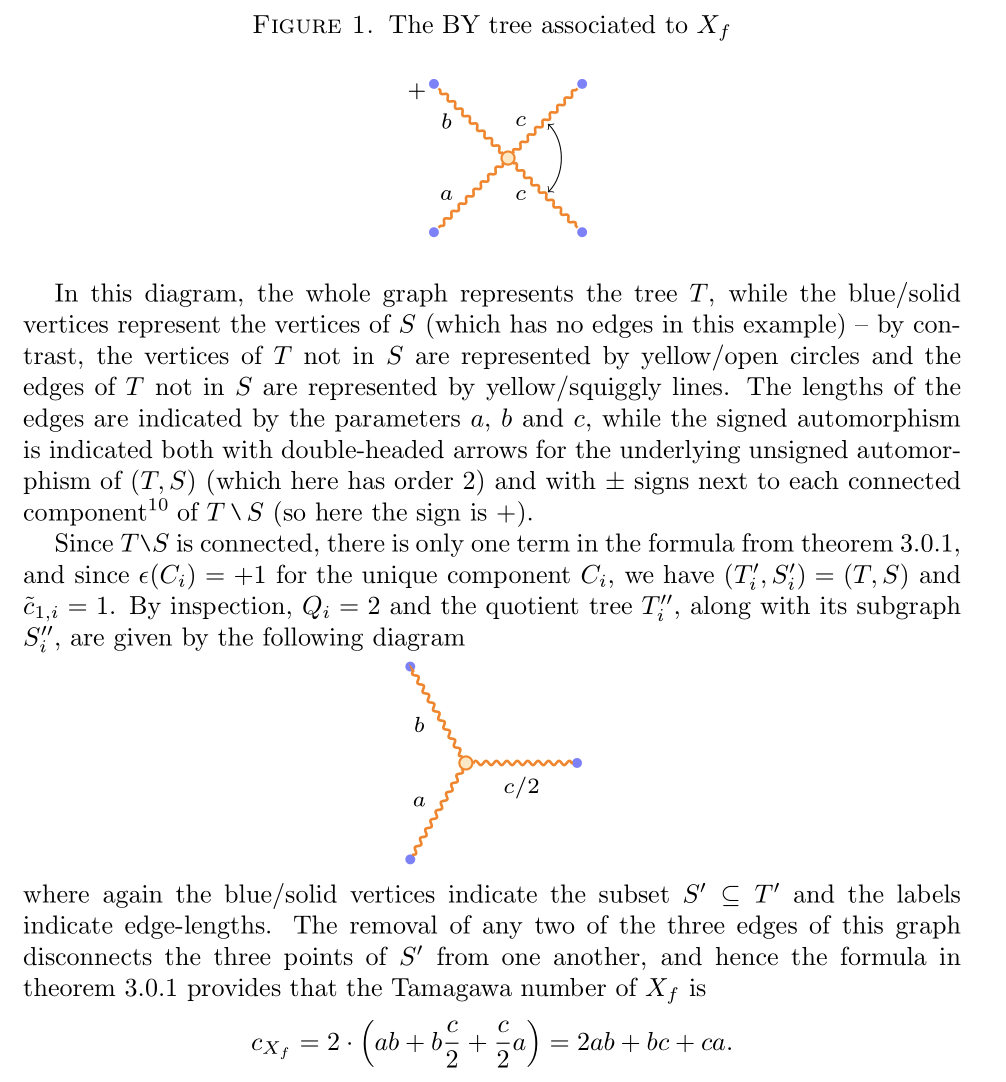

In [5]:
# picture time
from IPython.display import Image
Image(filename = "img/betts.png", width=int(600))

In [22]:
a = var('a', domain="positive")
b = var('b', domain="positive")
c = var('c', domain="positive")

verbose 1 (84: cluster_pictures.py, __init__) [[+Infinity, 1/2*a, 0, 0, 0, 0, 0, 0], [1/2*a, +Infinity, 0, 0, 0, 0, 0, 0], [0, 0, +Infinity, 1/2*b, 0, 0, 0, 0], [0, 0, 1/2*b, +Infinity, 0, 0, 0, 0], [0, 0, 0, 0, +Infinity, 1/2*c, 0, 0], [0, 0, 0, 0, 1/2*c, +Infinity, 0, 0], [0, 0, 0, 0, 0, 0, +Infinity, 1/2*c], [0, 0, 0, 0, 0, 0, 1/2*c, +Infinity]]
verbose 1 (84: cluster_pictures.py, __init__) None
verbose 1 (84: cluster_pictures.py, __init__) 0
verbose 1 (84: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0, 1], 2: [2, 3], 4: [4, 5], 6: [6, 7]})
verbose 1 (84: cluster_pictures.py, __init__) [[+Infinity, 1/2*a], [1/2*a, +Infinity]]
verbose 1 (84: cluster_pictures.py, __init__) None
verbose 1 (84: cluster_pictures.py, __init__) 1/2*a
verbose 1 (84: cluster_pictures.py, __init__) defaultdict(<class 'list'>, {0: [0], 1: [1]})
verbose 1 (84: cluster_pictures.py, __init__) [[+Infinity]]
verbose 1 (84: cluster_pictures.py, __init__) None
verbose 1 (84: cluster_pictures.py, _

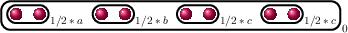

In [23]:
R = Cluster([[oo, a/2, 0,  0,  0,  0,   0,  0],
             [a/2, oo, 0,  0,  0,  0,   0,  0],
             [0,  0,  oo, b/2, 0,  0,   0,  0],
             [0,  0,  b/2, oo, 0,  0,   0,  0],
             [0,  0,  0,  0,  oo, c/2,  0,  0],
             [0,  0,  0,  0,  c/2, oo,  0,  0],
             [0,  0,  0,  0,  0,  0,  oo, c/2],
             [0,  0,  0,  0,  0,  0,  c/2, oo],
           ])
view(R)

verbose 1 (1405: cluster_pictures.py, BY_tree) Cluster with 8 roots and 4 children
verbose 1 (1405: cluster_pictures.py, BY_tree) Cluster with 2 roots and 2 children
verbose 1 (1733: cluster_pictures.py, add_yellow_edge) (Cluster with 8 roots and 4 children, Cluster with 2 roots and 2 children, a)
verbose 1 (1405: cluster_pictures.py, BY_tree) Cluster with 1 roots and 0 children
verbose 1 (1405: cluster_pictures.py, BY_tree) Cluster with 1 roots and 0 children
verbose 1 (1405: cluster_pictures.py, BY_tree) Cluster with 2 roots and 2 children
verbose 1 (1733: cluster_pictures.py, add_yellow_edge) (Cluster with 8 roots and 4 children, Cluster with 2 roots and 2 children, b)
verbose 1 (1405: cluster_pictures.py, BY_tree) Cluster with 1 roots and 0 children
verbose 1 (1405: cluster_pictures.py, BY_tree) Cluster with 1 roots and 0 children
verbose 1 (1405: cluster_pictures.py, BY_tree) Cluster with 2 roots and 2 children
verbose 1 (1733: cluster_pictures.py, add_yellow_edge) (Cluster with 8

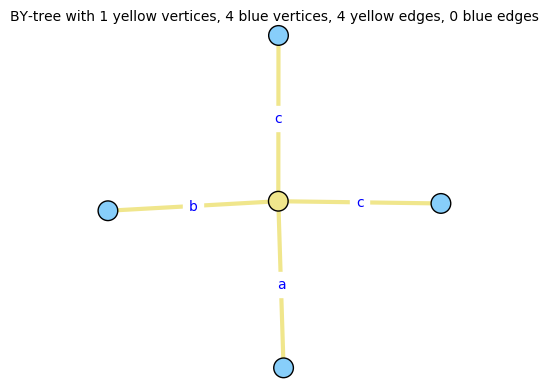

In [24]:
A,B,C1,C2 = R.children()
T = R.BY_tree()
T

In [25]:
F = BYTreeIsomorphism(T, T,
                      lambda x: {A:A, B:B, C1:C2, C2:C1, R:R}[x],
                      lambda Y: 1)

In [27]:
set_verbose(1)

In [28]:
T.tamagawa_number(F)

verbose 1 (2001: cluster_pictures.py, subgraph) {Cluster with 8 roots and 4 children: 0, Cluster with 2 roots and 2 children: 0, Cluster with 2 roots and 2 children: 0, Cluster with 2 roots and 2 children: 0, Cluster with 2 roots and 2 children: 0}
verbose 1 (2267: cluster_pictures.py, tamagawa_number) 4
verbose 1 (2267: cluster_pictures.py, tamagawa_number) 0
verbose 1 (2267: cluster_pictures.py, tamagawa_number) [[(Cluster with 8 roots and 4 children, Cluster with 2 roots and 2 children, a), (Cluster with 8 roots and 4 children, Cluster with 2 roots and 2 children, b), (Cluster with 8 roots and 4 children, Cluster with 2 roots and 2 children, c), (Cluster with 8 roots and 4 children, Cluster with 2 roots and 2 children, c)]]
verbose 1 (2267: cluster_pictures.py, tamagawa_number) [[[(Cluster with 8 roots and 4 children, Cluster with 2 roots and 2 children, a), (Cluster with 8 roots and 4 children, Cluster with 2 roots and 2 children, b), (Cluster with 8 roots and 4 children, Cluster w

2*a*b + a*c + b*c

For a second example, we could copy Betts again?

![title](img/betts.png)

In [10]:
p = 7
K = Qp(p)
x = polygen(K)
L.<i> = K.extension(x^2+1)
x = polygen(L)
b, z, w, a = 3, 5, 7, 11
((x^2+1)^2 - p^(2b))((x-1)^2 - p^(2a))(x-p^w)((x-p^(w+1))((x^2+1)^2 - p^(2w + 2 + 2a)))
R = Cluster.from_roots([L(t) for t in [i + p^(b),i - p^(b),- i + p^(b),- i - p^(b), 1 + p^(z),1 - p^(z), p^(w), p^(w+1), i*p^(w+1)+ p^(w+1+a), i*p^(w+1) - p^(w+1+a),- i*p^(w+1) + p^(w+1+a),-i*p^(w+1)- p^(w+1+a)]])

SyntaxError: invalid syntax (<ipython-input-10-57dcbe2cdfe7>, line 7)

In [ ]:
view(R)

In [2]:
R.tamagawa_number()

AttributeError: type object 'R' has no attribute 'tamagawa_number'

From the tree

In [3]:
a = var('a', domain="integer")
b = var('b', domain="integer")
z = var('z', domain="integer")
w = var('w', domain="integer")

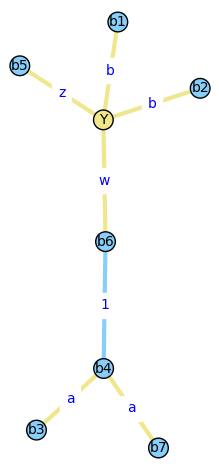

In [4]:
T = BYTree(name="Stick person")
T.add_blue_vertex('b1')
T.add_blue_vertex('b2')
T.add_blue_vertex('b3')
T.add_yellow_vertex('Y')
T.add_blue_vertex('b4')
T.add_blue_vertex('b5')
T.add_blue_vertex('b6')
T.add_blue_vertex('b7')
T.add_yellow_edge(('b1', 'Y', b))
T.add_yellow_edge(('b2', 'Y', b))
T.add_yellow_edge(('b5', 'Y', z))
T.add_yellow_edge(('b6', 'Y', w))
T.add_blue_edge(('b6', 'b4', 1))
T.add_yellow_edge(('b3', 'b4', a))
T.add_yellow_edge(('b7', 'b4', a))
plot(T,vertex_labels=True)

In [5]:
F = BYTreeIsomorphism(T, T, lambda x: {'b1':'b2','b2':'b1','b5':'b5',
                                       'b6':'b6', 'b4':'b4', 'b3':'b7','b7':'b3', 'Y':'Y'}[x],
                            lambda Y: 1 )

In [6]:
set_verbose(1)
T.tamagawa_number(F)

verbose 1 (2001: cluster_pictures.py, subgraph) {'b1': 0, 'b2': 0, 'b3': 0, 'Y': 0, 'b4': 0, 'b5': 0, 'b6': 0, 'b7': 0}
verbose 1 (2267: cluster_pictures.py, tamagawa_number) 7
verbose 1 (2267: cluster_pictures.py, tamagawa_number) 1
verbose 1 (2267: cluster_pictures.py, tamagawa_number) [[('Y', 'b1', b), ('Y', 'b2', b), ('Y', 'b5', z), ('Y', 'b6', w)], [('b3', 'b4', a)], [('b4', 'b7', a)]]
verbose 1 (2267: cluster_pictures.py, tamagawa_number) []
verbose 1 (2267: cluster_pictures.py, tamagawa_number) [('Y', 'b1', b), ('Y', 'b2', b), ('Y', 'b5', z), ('Y', 'b6', w)]
verbose 1 (2267: cluster_pictures.py, tamagawa_number) ('Y', 'b2', b)
verbose 1 (2267: cluster_pictures.py, tamagawa_number) else
verbose 1 (2267: cluster_pictures.py, tamagawa_number) adding new orbit
verbose 1 (2267: cluster_pictures.py, tamagawa_number) [[[('Y', 'b1', b), ('Y', 'b2', b), ('Y', 'b5', z), ('Y', 'b6', w)]]]
verbose 1 (2267: cluster_pictures.py, tamagawa_number) [('b3', 'b4', a)]
verbose 1 (2267: cluster_pict

(b*w + b*z + 2*w*z)*a

In [67]:
p = 5
K = Qp(p,100)
rs = [K(2), K(2+p), K(1), K(1+p)]
R1 = Cluster.from_roots(rs)
view(R1)

In [68]:
t = polygen(K)
x = polygen(t.parent())
f = prod(x - r for  r  in rs )
f

(1 + O(5^100))*x^4 + (4 + 5 + 4*5^2 + 4*5^3 + 4*5^4 + 4*5^5 + 4*5^6 + 4*5^7 + 4*5^8 + 4*5^9 + 4*5^10 + 4*5^11 + 4*5^12 + 4*5^13 + 4*5^14 + 4*5^15 + 4*5^16 + 4*5^17 + 4*5^18 + 4*5^19 + 4*5^20 + 4*5^21 + 4*5^22 + 4*5^23 + 4*5^24 + 4*5^25 + 4*5^26 + 4*5^27 + 4*5^28 + 4*5^29 + 4*5^30 + 4*5^31 + 4*5^32 + 4*5^33 + 4*5^34 + 4*5^35 + 4*5^36 + 4*5^37 + 4*5^38 + 4*5^39 + 4*5^40 + 4*5^41 + 4*5^42 + 4*5^43 + 4*5^44 + 4*5^45 + 4*5^46 + 4*5^47 + 4*5^48 + 4*5^49 + 4*5^50 + 4*5^51 + 4*5^52 + 4*5^53 + 4*5^54 + 4*5^55 + 4*5^56 + 4*5^57 + 4*5^58 + 4*5^59 + 4*5^60 + 4*5^61 + 4*5^62 + 4*5^63 + 4*5^64 + 4*5^65 + 4*5^66 + 4*5^67 + 4*5^68 + 4*5^69 + 4*5^70 + 4*5^71 + 4*5^72 + 4*5^73 + 4*5^74 + 4*5^75 + 4*5^76 + 4*5^77 + 4*5^78 + 4*5^79 + 4*5^80 + 4*5^81 + 4*5^82 + 4*5^83 + 4*5^84 + 4*5^85 + 4*5^86 + 4*5^87 + 4*5^88 + 4*5^89 + 4*5^90 + 4*5^91 + 4*5^92 + 4*5^93 + 4*5^94 + 4*5^95 + 4*5^96 + 4*5^97 + 4*5^98 + 4*5^99 + O(5^100))*x^3 + (3 + 5 + 3*5^2 + O(5^100))*x^2 + (3 + 4*5 + 3*5^2 + 3*5^3 + 4*5^4 + 4*5^5 + 4*5^

In [69]:
P = f.subs({x:x-t}).resultant(f)
P

(1 + O(5^100))*x^16 + O(5^100)*x^15 + (1 + 4*5 + 4*5^3 + 4*5^4 + 4*5^5 + 4*5^6 + 4*5^7 + 4*5^8 + 4*5^9 + 4*5^10 + 4*5^11 + 4*5^12 + 4*5^13 + 4*5^14 + 4*5^15 + 4*5^16 + 4*5^17 + 4*5^18 + 4*5^19 + 4*5^20 + 4*5^21 + 4*5^22 + 4*5^23 + 4*5^24 + 4*5^25 + 4*5^26 + 4*5^27 + 4*5^28 + 4*5^29 + 4*5^30 + 4*5^31 + 4*5^32 + 4*5^33 + 4*5^34 + 4*5^35 + 4*5^36 + 4*5^37 + 4*5^38 + 4*5^39 + 4*5^40 + 4*5^41 + 4*5^42 + 4*5^43 + 4*5^44 + 4*5^45 + 4*5^46 + 4*5^47 + 4*5^48 + 4*5^49 + 4*5^50 + 4*5^51 + 4*5^52 + 4*5^53 + 4*5^54 + 4*5^55 + 4*5^56 + 4*5^57 + 4*5^58 + 4*5^59 + 4*5^60 + 4*5^61 + 4*5^62 + 4*5^63 + 4*5^64 + 4*5^65 + 4*5^66 + 4*5^67 + 4*5^68 + 4*5^69 + 4*5^70 + 4*5^71 + 4*5^72 + 4*5^73 + 4*5^74 + 4*5^75 + 4*5^76 + 4*5^77 + 4*5^78 + 4*5^79 + 4*5^80 + 4*5^81 + 4*5^82 + 4*5^83 + 4*5^84 + 4*5^85 + 4*5^86 + 4*5^87 + 4*5^88 + 4*5^89 + 4*5^90 + 4*5^91 + 4*5^92 + 4*5^93 + 4*5^94 + 4*5^95 + 4*5^96 + 4*5^97 + 4*5^98 + 4*5^99 + O(5^100))*x^14 + O(5^100)*x^13 + (1 + 5 + 2*5^3 + 5^4 + 5^5 + O(5^100))*x^12 + O(5^10

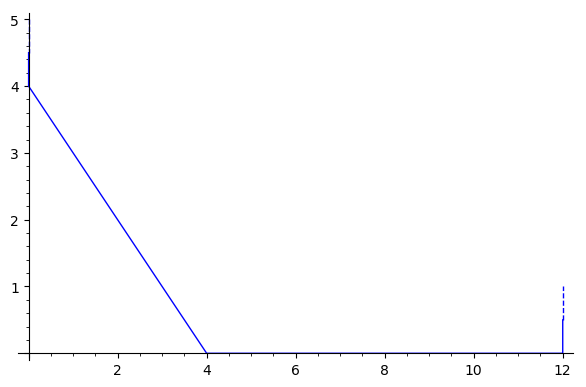

In [73]:
P.shift(-4).newton_polygon().plot()

In [78]:
P.shift(-4).factor_of_slope(0)

(1 + O(5^100))*x^8 + O(5^100)*x^7 + (1 + 4*5 + 2*5^2 + 4*5^3 + 4*5^4 + 4*5^5 + 4*5^6 + 4*5^7 + 4*5^8 + 4*5^9 + 4*5^10 + 4*5^11 + 4*5^12 + 4*5^13 + 4*5^14 + 4*5^15 + 4*5^16 + 4*5^17 + 4*5^18 + 4*5^19 + 4*5^20 + 4*5^21 + 4*5^22 + 4*5^23 + 4*5^24 + 4*5^25 + 4*5^26 + 4*5^27 + 4*5^28 + 4*5^29 + 4*5^30 + 4*5^31 + 4*5^32 + 4*5^33 + 4*5^34 + 4*5^35 + 4*5^36 + 4*5^37 + 4*5^38 + 4*5^39 + 4*5^40 + 4*5^41 + 4*5^42 + 4*5^43 + 4*5^44 + 4*5^45 + 4*5^46 + 4*5^47 + 4*5^48 + 4*5^49 + 4*5^50 + 4*5^51 + 4*5^52 + 4*5^53 + 4*5^54 + 4*5^55 + 4*5^56 + 4*5^57 + 4*5^58 + 4*5^59 + 4*5^60 + 4*5^61 + 4*5^62 + 4*5^63 + 4*5^64 + 4*5^65 + 4*5^66 + 4*5^67 + 4*5^68 + 4*5^69 + 4*5^70 + 4*5^71 + 4*5^72 + 4*5^73 + 4*5^74 + 4*5^75 + 4*5^76 + 4*5^77 + 4*5^78 + 4*5^79 + 4*5^80 + 4*5^81 + 4*5^82 + 4*5^83 + 4*5^84 + 4*5^85 + 4*5^86 + 4*5^87 + 4*5^88 + 4*5^89 + 4*5^90 + 4*5^91 + 4*5^92 + 4*5^93 + 4*5^94 + 4*5^95 + 4*5^96 + 4*5^97 + 4*5^98 + 4*5^99 + O(5^100))*x^6 + O(5^100)*x^5 + (1 + 5 + 2*5^2 + 5^4 + O(5^100))*x^4 + O(5^100)*

In [ ]:
(P//x).newton_slopes

In [ ]:
(P//x).newton_slopes

In [23]:


K.<i> = Qq(3^2)
i^8 == 16

True

In [18]:
set_verbose(0)
R2 = Cluster.from_roots([K(0), K(2), K(3), K(1)])
view(R2)

(3 + 3*5^3 + 3*5^4 + 5^5 + 5^6 + 4*5^7 + 5^10 + 2*5^11 + 4*5^12 + 2*5^13 + 2*5^15 + 5^17 + O(5^20)) * ((1 + O(5^20))*x^4 + (2 + 2*5 + 3*5^3 + 4*5^4 + 4*5^5 + 5^8 + 2*5^9 + 3*5^10 + 3*5^12 + 3*5^13 + 2*5^14 + 5^15 + 2*5^16 + 5^17 + 5^18 + 2*5^19 + O(5^20))*x^3 + (3 + 3*5 + 3*5^2 + 5^3 + 4*5^4 + 2*5^5 + 4*5^6 + 2*5^7 + 2*5^8 + 2*5^9 + 4*5^10 + 2*5^12 + 2*5^13 + 4*5^14 + 3*5^16 + 2*5^17 + 5^18 + 3*5^19 + O(5^20))*x^2 + (2 + 4*5^2 + 5^4 + 5^5 + 5^6 + 3*5^7 + 4*5^8 + 2*5^10 + 2*5^11 + 2*5^12 + 2*5^14 + 4*5^15 + 5^16 + 5^17 + 4*5^18 + 3*5^19 + O(5^20))*x + 1 + 2*5^2 + 2*5^3 + 4*5^5 + 4*5^6 + 4*5^7 + 4*5^8 + 4*5^9 + 2*5^11 + 2*5^13 + 2*5^14 + 2*5^15 + 2*5^18 + O(5^20))


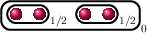

In [144]:
x = polygen(Zp(3))

f =  x.parent().random_element(4)
print(f.factor())
view(Cluster.from_polynomial(f))

In [151]:
t = polygen(K)
x = polygen(t.parent())
f = (1 + O(5^20))*x^4 + (2 + 2*5 + 3*5^3 + 4*5^4 + 4*5^5 + 5^8 + 2*5^9 + 3*5^10 + 3*5^12 + 3*5^13 + 2*5^14 + 5^15 + 2*5^16 + 5^17 + 5^18 + 2*5^19 + O(5^20))*x^3 + (3 + 3*5 + 3*5^2 + 5^3 + 4*5^4 + 2*5^5 + 4*5^6 + 2*5^7 + 2*5^8 + 2*5^9 + 4*5^10 + 2*5^12 + 2*5^13 + 4*5^14 + 3*5^16 + 2*5^17 + 5^18 + 3*5^19 + O(5^20))*x^2 + (2 + 4*5^2 + 5^4 + 5^5 + 5^6 + 3*5^7 + 4*5^8 + 2*5^10 + 2*5^11 + 2*5^12 + 2*5^14 + 4*5^15 + 5^16 + 5^17 + 4*5^18 + 3*5^19 + O(5^20))*x + 1 + 2*5^2 + 2*5^3 + 4*5^5 + 4*5^6 + 4*5^7 + 4*5^8 + 4*5^9 + 2*5^11 + 2*5^13 + 2*5^14 + 2*5^15 + 2*5^18 + O(5^20)

In [152]:
f

(1 + O(5^20))*x^4 + (2 + 2*5 + 3*5^3 + 4*5^4 + 4*5^5 + 5^8 + 2*5^9 + 3*5^10 + 3*5^12 + 3*5^13 + 2*5^14 + 5^15 + 2*5^16 + 5^17 + 5^18 + 2*5^19 + O(5^20))*x^3 + (3 + 3*5 + 3*5^2 + 5^3 + 4*5^4 + 2*5^5 + 4*5^6 + 2*5^7 + 2*5^8 + 2*5^9 + 4*5^10 + 2*5^12 + 2*5^13 + 4*5^14 + 3*5^16 + 2*5^17 + 5^18 + 3*5^19 + O(5^20))*x^2 + (2 + 4*5^2 + 5^4 + 5^5 + 5^6 + 3*5^7 + 4*5^8 + 2*5^10 + 2*5^11 + 2*5^12 + 2*5^14 + 4*5^15 + 5^16 + 5^17 + 4*5^18 + 3*5^19 + O(5^20))*x + 1 + 2*5^2 + 2*5^3 + 4*5^5 + 4*5^6 + 4*5^7 + 4*5^8 + 4*5^9 + 2*5^11 + 2*5^13 + 2*5^14 + 2*5^15 + 2*5^18 + O(5^100)

In [153]:
P = f.subs({x:x-t}).resultant(f)
P

(1 + O(5^20))*x^16 + O(5^20)*x^15 + (2 + 2*5 + 2*5^2 + 4*5^3 + 2*5^4 + 3*5^5 + 3*5^6 + 5^7 + 3*5^9 + 4*5^13 + 5^14 + 4*5^16 + 5^17 + 5^18 + 2*5^19 + O(5^20))*x^14 + O(5^20)*x^13 + (4 + 4*5 + 5^2 + 3*5^3 + 3*5^4 + 2*5^5 + 2*5^6 + 2*5^7 + 2*5^8 + 2*5^9 + 4*5^10 + 4*5^11 + 2*5^12 + 4*5^13 + 5^14 + 2*5^15 + 3*5^16 + 5^17 + 3*5^18 + 2*5^19 + O(5^20))*x^12 + O(5^20)*x^11 + (3 + 3*5 + 2*5^2 + 2*5^3 + 2*5^4 + 4*5^6 + 5^7 + 4*5^8 + 5^10 + 3*5^11 + 3*5^12 + 5^13 + 3*5^14 + 2*5^15 + 5^17 + 4*5^18 + 5^19 + O(5^20))*x^10 + O(5^20)*x^9 + (1 + 5^2 + 3*5^4 + 4*5^5 + 4*5^6 + 4*5^7 + 4*5^8 + 5^9 + 4*5^10 + 3*5^11 + 5^12 + 4*5^13 + 4*5^14 + 5^15 + 3*5^16 + 3*5^17 + 3*5^18 + 5^19 + O(5^20))*x^8 + O(5^20)*x^7 + (2*5 + 2*5^2 + 5^3 + 5^4 + 4*5^5 + 2*5^6 + 3*5^7 + 2*5^10 + 4*5^11 + 4*5^12 + 4*5^13 + 2*5^15 + 4*5^16 + 5^17 + 2*5^18 + 3*5^19 + O(5^20))*x^6 + O(5^20)*x^5 + (3*5^2 + 2*5^4 + 4*5^7 + 4*5^8 + 3*5^9 + 3*5^10 + 3*5^11 + 4*5^12 + 2*5^13 + 5^14 + 2*5^15 + 4*5^16 + 5^17 + 5^18 + 3*5^19 + O(5^20))*x^4 + O

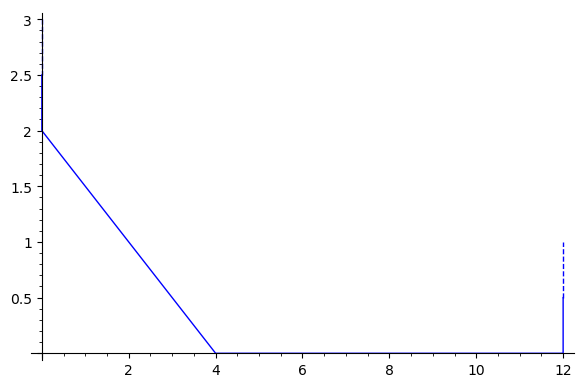

In [157]:
P.shift(-4).newton_polygon().plot()

In [163]:
P.shift(-4).factor_of_slope(1/2).factor()

(1 + O(5^20))*x^4 + O(5^20)*x^3 + (2*5 + 3*5^6 + 5^7 + 5^8 + 4*5^9 + 5^10 + 2*5^11 + 5^12 + 5^13 + 5^14 + 5^15 + 3*5^16 + 3*5^17 + 4*5^19 + O(5^20))*x^2 + O(5^20)*x + 3*5^2 + 3*5^3 + 5^4 + 5^5 + 4*5^6 + 2*5^7 + 5^8 + 2*5^9 + 5^10 + 2*5^11 + 2*5^12 + 5^13 + 5^15 + 3*5^16 + 5^19 + O(5^20)

In [162]:
P.shift(-4).factor_of_slope(0).factor()

((1 + O(5^20))*x^4 + O(5^20)*x^3 + (1 + 5^2 + 2*5^3 + 5^4 + 4*5^5 + 2*5^6 + 2*5^7 + 4*5^8 + 5^9 + 4*5^10 + 3*5^11 + 5^12 + 5^13 + 2*5^15 + 4*5^17 + 2*5^18 + 5^19 + O(5^20))*x^2 + (2*5 + 2*5^2 + 3*5^3 + 4*5^4 + 5^5 + 3*5^6 + 3*5^8 + 2*5^9 + 5^10 + 5^11 + 4*5^12 + 4*5^13 + 4*5^15 + 5^16 + O(5^20))*x + 4 + 2*5 + 3*5^3 + 4*5^4 + 3*5^5 + 3*5^6 + 2*5^8 + 2*5^9 + 3*5^10 + 2*5^11 + 5^13 + 5^14 + 5^15 + 3*5^16 + 5^18 + 4*5^19 + O(5^20)) * ((1 + O(5^20))*x^4 + O(5^20)*x^3 + (1 + 5^2 + 2*5^3 + 5^4 + 4*5^5 + 2*5^6 + 2*5^7 + 4*5^8 + 5^9 + 4*5^10 + 3*5^11 + 5^12 + 5^13 + 2*5^15 + 4*5^17 + 2*5^18 + 5^19 + O(5^20))*x^2 + (3*5 + 2*5^2 + 5^3 + 3*5^5 + 5^6 + 4*5^7 + 5^8 + 2*5^9 + 3*5^10 + 3*5^11 + 4*5^14 + 3*5^16 + 4*5^17 + 4*5^18 + 4*5^19 + O(5^20))*x + 4 + 2*5 + 3*5^3 + 4*5^4 + 3*5^5 + 3*5^6 + 2*5^8 + 2*5^9 + 3*5^10 + 2*5^11 + 5^13 + 5^14 + 5^15 + 3*5^16 + 5^18 + 4*5^19 + O(5^20))

In [177]:
K = Qp(5)
C = Cluster.from_roots([K(1), K(5), K(10)])

0
<class 'sage.symbolic.expression.Expression'>
3
[20, 0, 0, 0, 20, 1, 0, 1, 20]
20
<class 'sage.symbolic.expression.Expression'>
1
[20]
1
<class 'sage.symbolic.expression.Expression'>
2
[20, 1, 1, 20]
20
<class 'sage.symbolic.expression.Expression'>
1
[20]
20
<class 'sage.symbolic.expression.Expression'>
1
[20]
